<a href="https://colab.research.google.com/github/LanguageExchanger/TimeSeries/blob/main/%ED%95%9C%EA%B5%AD_%EC%A3%BC%EA%B0%80%EC%A7%80%EC%88%98_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reload the uploaded file
file_path = "/content/sample_data/한국 주가지수.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand structure
df.head()

,통계표,계정항목,단위,변환,2015/01,2015/02,2015/03,2015/04,2015/05,2015/06,...,2024/03,2024/04,2024/05,2024/06,2024/07,2024/08,2024/09,2024/10,2024/11,2024/12
0,9.1.6.2. 국제 주요국 주가지수,한국,2015=100,원자료,95.5,97.5,100.1,104.8,105.3,102.6,...,134.1,133.0,134.7,136.5,139.7,131.7,128.8,129.0,124.5,121.4


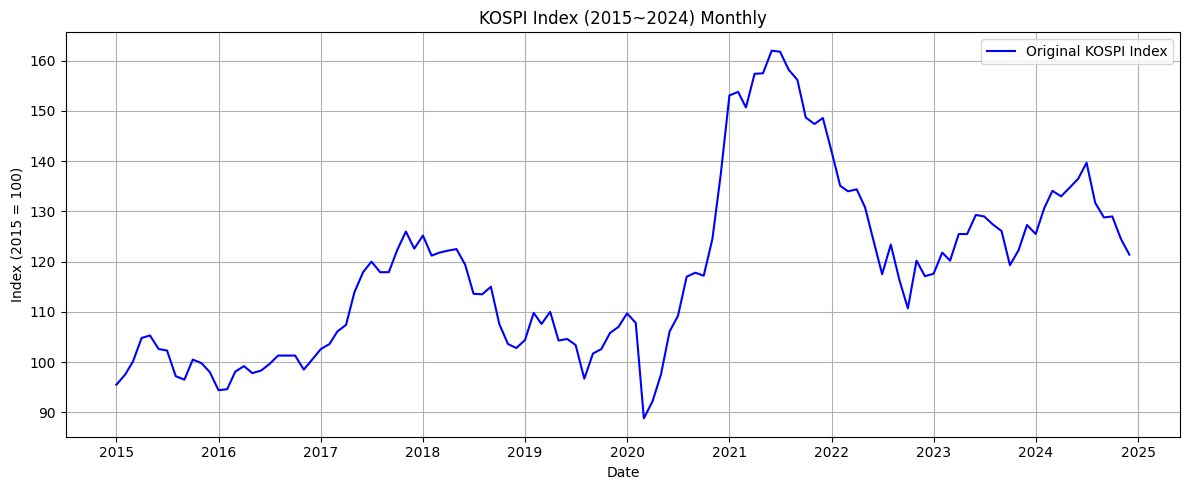

In [5]:
# Transpose the data to convert dates into index
ts_data = df.iloc[0, 4:]  # Skip metadata columns
ts_data.index = pd.to_datetime(ts_data.index, format="%Y/%m")
ts_data = ts_data.astype(float)

# Plot original index
plt.figure(figsize=(12, 5))
plt.plot(ts_data, label="Original KOSPI Index", color='blue')
plt.title("KOSPI Index (2015~2024) Monthly")
plt.xlabel("Date")
plt.ylabel("Index (2015 = 100)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

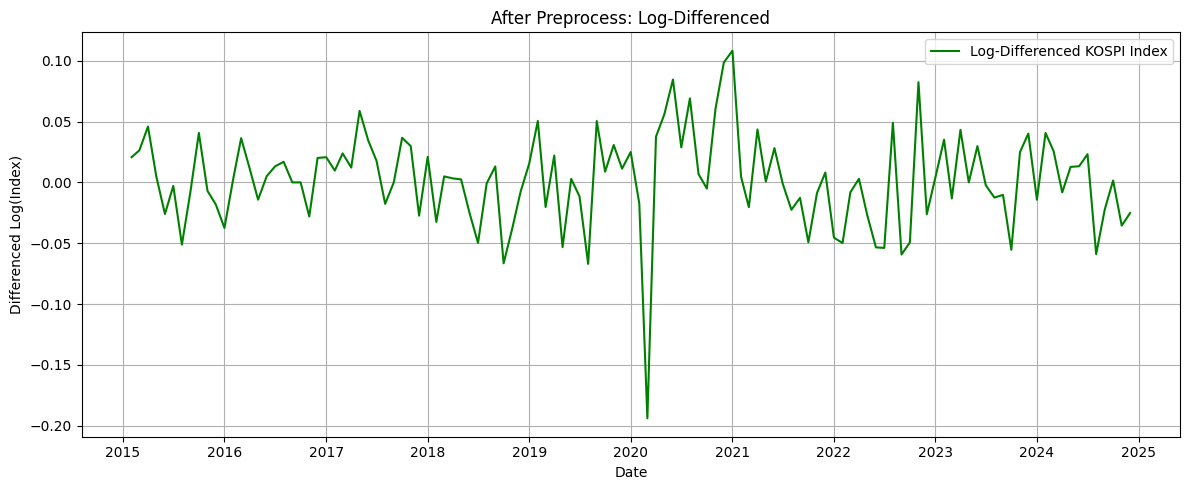

In [9]:
import numpy as np

# 1. 로그 변환
log_ts = np.log(ts_data)

# 2. 1차 차분
diff_log_ts = log_ts.diff().dropna()

# Plot the transformed (log + differenced) time series
plt.figure(figsize=(12, 5))
plt.plot(diff_log_ts, label="Log-Differenced KOSPI Index", color='green')
plt.title("After Preprocess: Log-Differenced")
plt.xlabel("Date")
plt.ylabel("Differenced Log(Index)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np

# 로그 변환 + 1차 차분
log_ts = np.log(ts_data)
diff_log_ts = log_ts.diff().dropna()

# ADF test
adf_pvalue = adfuller(diff_log_ts)[1]

# KPSS test
kpss_pvalue = kpss(diff_log_ts, regression='c')[1]

print("유의수준: 0.05")
print(f"ADF p-value:{adf_pvalue:.2}")
print(f"KPSS p-value:{kpss_pvalue:.2}")

# 판정
if adf_pvalue > 0.05 or kpss_pvalue < 0.05:
    print("❌ 비정상 시계열입니다.")
    print("✔ 계절 차분 또는 2차 차분, STL 분해 등을 고려하세요.")
else:
    print("✅ 정상 시계열입니다.")


유의수준: 0.05
ADF p-value:1.6e-15
KPSS p-value:0.1
✅ 정상 시계열입니다.


<ipython-input-15-1ae3283bc884>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_pvalue = kpss(diff_log_ts, regression='c')[1]
